### 패키지 다운로드

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

### 버전 확인

In [5]:
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('sklearn : %s'%(sk.__version__))
print('matplotlib : %s'%(matplotlib.__version__))
print('seaborn : %s'%(sns.__version__))

Pandas : 1.2.3
Numpy : 1.19.2
sklearn : 0.24.2
matplotlib : 3.3.1
seaborn : 0.11.1


In [2]:
data=pd.read_csv(r'C:\Users\vmffl\workspace\우리은행 데이터경진대회 데이터셋\우리은행 데이터경진대회 데이터셋.csv',index_col=0)
print(data.shape)
data.head()

(119535, 93)


,TARGET,J_F1_LON_RK_3M_CNT_RE,J_F1_OTHER_LON_6M_AVBL_AM_RE,J_F1_OTHER_LON_MAX_3M_AM_RE,J_SHINBO_GIBO_AM_RE,J_TOT_LON_CNT_RE,J_TOT_LON_AGG_AM_RE,J_TOT_LON_MAX_AM_RE,J_DPS_CT_BAL_AM_RE,J_TOT_DPS_1M_AVBL_AM_RE,...,P_BR_CNTC_1M_CNT_RE,P_BR_CNTC_6M_CNT_RE,P_ATM_CNTC_6M_CNT_RE,P_INT_CNTC_6M_CNT_RE,P_TOT_LON_CNT_RE,P_TOT_LON_AGG_AM_RE,P_TOT_TS_6M_CNT_RE,P_TOT_TS_6M_AM_RE,P_OB_TS_6M_CNT_RE,P_OB_TS_6M_AM_RE
1,0,2,3,4,1,2,3,3,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,1,2,3,1,1,1,1,3,3,...,1,3,3,1,1,1,3,3,3,3
3,0,2,3,4,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,3,3,4,1,4,4,4,1,1,...,3,3,3,1,3,3,1,1,1,1
5,0,3,3,4,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### 결측치 확인

In [16]:
pd.options.display.min_rows = 93
checknull=data.isnull().sum()
checknull

TARGET                          0
J_F1_LON_RK_3M_CNT_RE           0
J_F1_OTHER_LON_6M_AVBL_AM_RE    0
J_F1_OTHER_LON_MAX_3M_AM_RE     0
J_SHINBO_GIBO_AM_RE             0
J_TOT_LON_CNT_RE                0
J_TOT_LON_AGG_AM_RE             0
J_TOT_LON_MAX_AM_RE             0
J_DPS_CT_BAL_AM_RE              0
J_TOT_DPS_1M_AVBL_AM_RE         0
J_TOT_DPS_6M_AVBL_AM_RE         0
J_CORE_DPS_1M_AVBL_AM_RE        0
J_CORE_DPS_6M_AVBL_AM_RE        0
J_TOT_DPS_ACC_CNT_RE            0
J_NRML_DPS_ACC_CNT_RE           0
J_TOT_SAVING_ACC_CNT_RE         0
J_NRML_SAVING_ACC_CNT_RE        0
J_TOT_TS_1M_CNT_RE              0
J_TOT_TS_6M_CNT_RE              0
J_TOT_TS_1M_AM_RE               0
J_TOT_TS_6M_AM_RE               0
J_OB_TS_1M_CNT_RE               0
J_OB_TS_6M_CNT_RE               0
J_OB_TS_1M_AM_RE                0
J_OB_TS_6M_AM_RE                0
J_IB_TS_1M_CNT_RE               0
J_IB_TS_6M_CNT_RE               0
J_IB_TS_1M_AM_RE                0
J_IB_TS_6M_AM_RE                0
J_TOT_TS_3M_AV

In [15]:
print("Columns that has null data : %d"%(checknull[checknull>0].shape))
print(checknull[checknull>0])

Columns that has null data : 0
Series([], dtype: int64)


## Exploratory Data Analysis

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119535 entries, 1 to 119535
Data columns (total 93 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   TARGET                        119535 non-null  int64
 1   J_F1_LON_RK_3M_CNT_RE         119535 non-null  int64
 2   J_F1_OTHER_LON_6M_AVBL_AM_RE  119535 non-null  int64
 3   J_F1_OTHER_LON_MAX_3M_AM_RE   119535 non-null  int64
 4   J_SHINBO_GIBO_AM_RE           119535 non-null  int64
 5   J_TOT_LON_CNT_RE              119535 non-null  int64
 6   J_TOT_LON_AGG_AM_RE           119535 non-null  int64
 7   J_TOT_LON_MAX_AM_RE           119535 non-null  int64
 8   J_DPS_CT_BAL_AM_RE            119535 non-null  int64
 9   J_TOT_DPS_1M_AVBL_AM_RE       119535 non-null  int64
 10  J_TOT_DPS_6M_AVBL_AM_RE       119535 non-null  int64
 11  J_CORE_DPS_1M_AVBL_AM_RE      119535 non-null  int64
 12  J_CORE_DPS_6M_AVBL_AM_RE      119535 non-null  int64
 13  J_TOT_DPS_ACC_

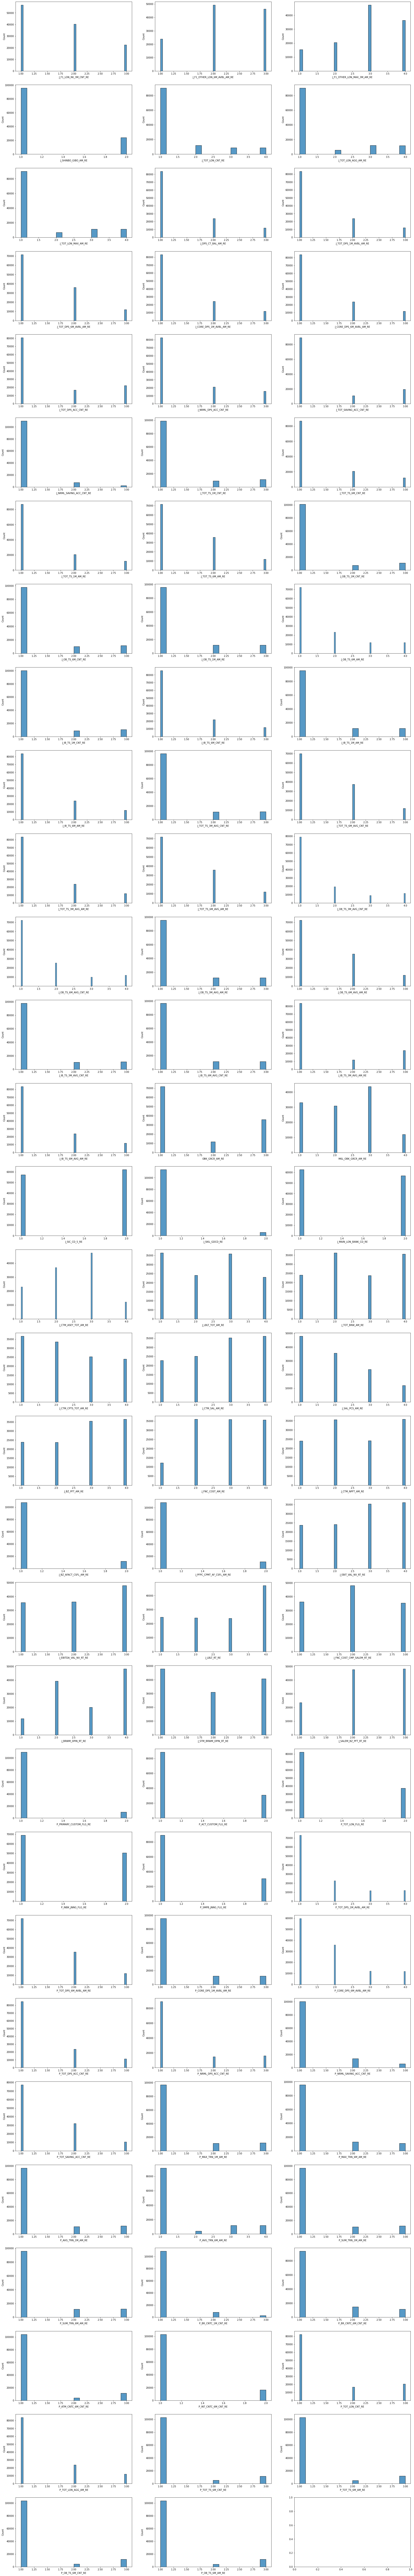

In [15]:
#'TARGER'데이터를 제외한 데이터들의 분포.
fig, axes = plt.subplots(31,3)
fig.set_size_inches(30,200)
axx=axes.flatten()

for i in range(93):
    col_index=i+1
    if col_index == 93 : break
    sns.histplot(data[data.columns[col_index]],ax=axx[i])
    

<AxesSubplot:>

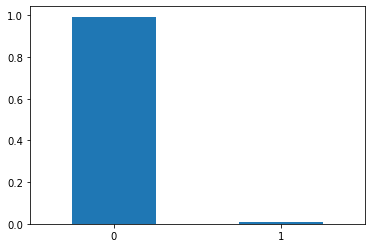

In [33]:
#'TARGET'데이터의 분포(불균형이 심함)
data['TARGET'].value_counts(normalize=True).plot(kind='bar',rot=0)

In [21]:
print(data['TARGET'].value_counts())

0    118720
1       815
Name: TARGET, dtype: int64


In [22]:
print("Proportion of TARGET data")
print(data['TARGET'].value_counts(normalize=True))

Proportion of TARGET data
0    0.993182
1    0.006818
Name: TARGET, dtype: float64


### Train Test split

In [25]:
Y=data['TARGET']
X=data.drop(['TARGET'],axis=1)
nominal_col=[42,43,44,63,64,65,66,67]
X.iloc[:,nominal_col] = X.iloc[:,nominal_col].astype('category')
X.iloc[:,nominal_col]=X.iloc[:,nominal_col].replace([1,2],[0,1])
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=1004)

### Oversampling Using SMOTENC

In [26]:
smote_nc = SMOTENC(categorical_features=nominal_col, random_state=1004)
X_smotenc, Y_smotenc = smote_nc.fit_resample(X_train, Y_train)

In [27]:
X_smotenc.shape

(166224, 92)

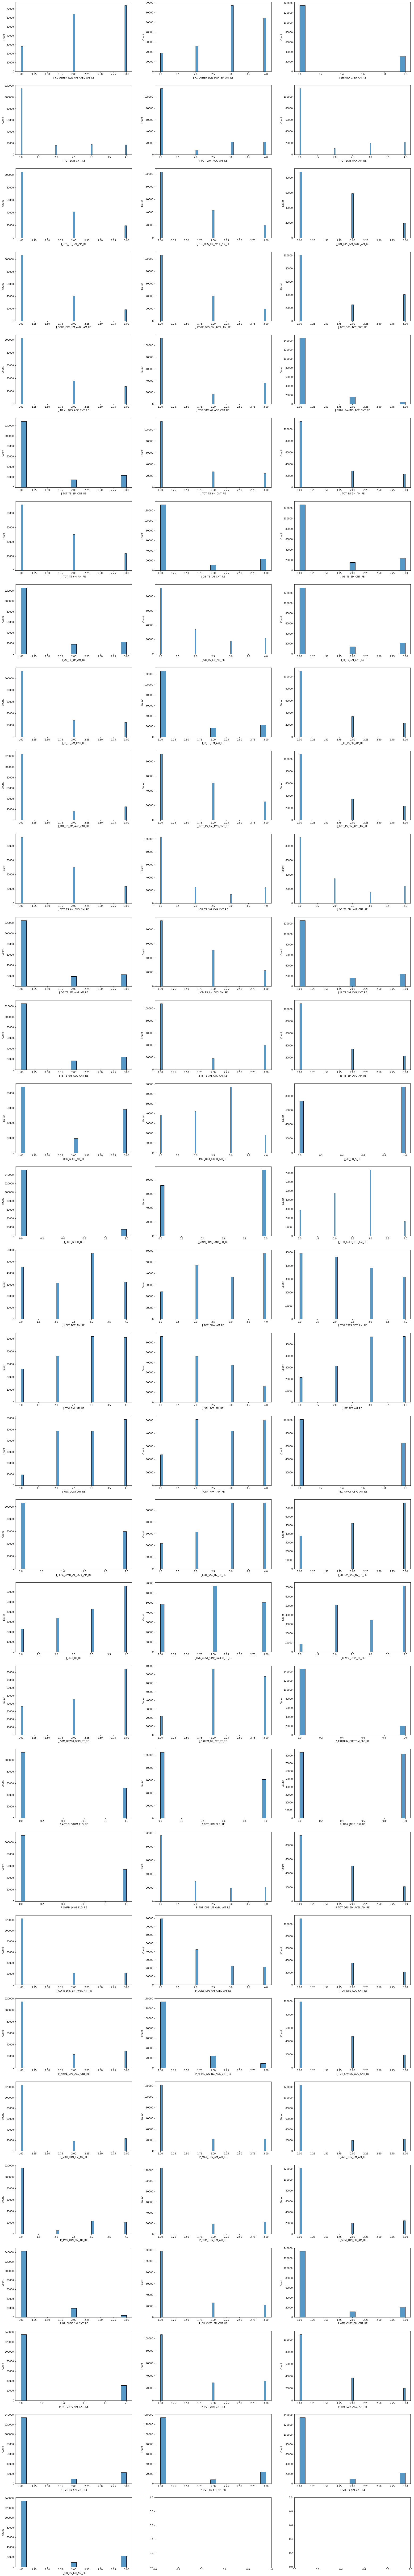

In [29]:
#오버샘플링 후 TARGER'데이터를 제외한 데이터들의 분포.
fig, axes = plt.subplots(31,3)
fig.set_size_inches(30,200)
axx=axes.flatten()

for i in range(92):
    col_index=i+1
    if col_index == 92 : break
    sns.histplot(X_smotenc[X_smotenc.columns[col_index]],ax=axx[i])

<AxesSubplot:>

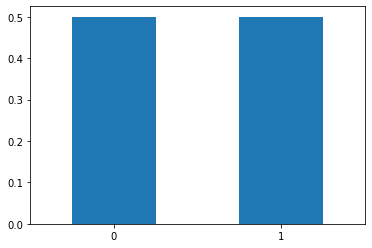

In [34]:
Y_smotenc.value_counts(normalize=True).plot(kind='bar',rot=0)

In [35]:
Y_smotenc.value_counts()

0    83112
1    83112
Name: TARGET, dtype: int64